In [21]:
%matplotlib inline
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [23]:
import katarchive

import datetime

import logging
logging.root.setLevel(logging.ERROR)


In [24]:
katarchive.product_filter.only_ar1()

begin="01/09/2016"
end="30/09/2016"


In [25]:
def channels(details):
    ch32k="32768"
    mode="4k" # default
    if ch32k in details:
        mode="32k"
    return mode


In [26]:
print katarchive.search_archive(startdate=begin,enddate=end)


Searched using: CAS.ProductTypeName:(MeerKATAR1TelescopeProduct) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2016-08-31T22:00:00Z TO 2016-09-30T21:59:59Z]
Returning 611 results
[['1475270728.h5', '2016-09-30 23:25:31 SAST', 'AR1', 65209784628], ['1475250518.h5', '2016-09-30 17:48:42 SAST', 'AR1', 36749350924], ['1475249987.h5', '2016-09-30 17:39:51 SAST', 'AR1', 766755438], ['1475248919.h5', '2016-09-30 17:23:20 SAST', 'AR1', 1152040881], ['1475238612.h5', '2016-09-30 14:30:15 SAST', 'AR1', 8097528200], ['1475238002.h5', '2016-09-30 14:20:05 SAST', 'Buntu', 684314538], ['1475236302.h5', '2016-09-30 13:51:46 SAST', 'Buntu', 861776942], ['1475228737.h5', '2016-09-30 11:46:04 SAST', 'CAM', 155959942], ['1475228300.h5', '2016-09-30 11:38:51 SAST', 'CAM', 153563165], ['1475225189.h5', '2016-09-30 10:46:52 SAST', 'CAM', 151125862], ['1475225050.h5', '2016-09-30 10:44:47 SAST', 'CAM', 148752504], ['1475224917.h5', '2016-09-30 10:42:03 SAST', 'sarah', 79518733], ['1475224595.h5', '20

In [27]:
f = katarchive.search_archive(startdate=begin,enddate=end)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(MeerKATAR1TelescopeProduct) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2016-08-31T22:00:00Z TO 2016-09-30T21:59:59Z]
Returning 611 results


In [28]:
#print 'First file in run: ' , start.isoformat()
#print 'Last file in run: ' , end.isoformat()


In [29]:
f.sort(key=lambda k: k.metadata.StartTime)

In [30]:
for fi in f:
    txts=fi.metadata.InstructionSet
    #p=findproj(txts)
    #print fi.metadata.ExperimentID, np.round(fi.metadata.Duration/3600.,2),\
    #len(fi.metadata.Antennas),channels(fi.metadata.Details),fi.metadata.Description
    
    print("%13s %6.2fhrs %2dants %3s %s") %(fi.metadata.ExperimentID, np.round(fi.metadata.Duration/3600.,2),\
    len(fi.metadata.Antennas),channels(fi.metadata.Details),fi.metadata.Description)


20160901-0014   0.09hrs  9ants 32k AR1: MKAIV-215 Phase-up 0408
20160901-0022   0.12hrs 11ants  4k AR1: MKAIV-78 Quick Check Point Source Scan
20160901-0023   0.12hrs 11ants  4k AR1: MKAIV-78 Quick Check Point Source Scan
20160901-0028   0.12hrs 11ants  4k AR1: MKAIV-214 Phase-up 1934
20160901-0025   0.52hrs 11ants  4k AR1:  Imaging observation
20160901-0029   0.03hrs 11ants  4k AR1: MKAIV-214 Phase-up 1934
20160901-0031   0.07hrs 11ants  4k AR1: MKAIV-214 Phase-up 1934
20160901-0032  10.00hrs 11ants  4k AR1:  Imaging observation
20160902-0008   0.05hrs 11ants 32k AR1: MKAIV-215 Phase-up 0408
20160902-0009   0.07hrs 11ants 32k AR1: MKAIV-215 Phase-up 0408
20160902-0010   0.41hrs 11ants 32k AR1: Bandpass calibration
20160902-0013   0.07hrs 11ants 32k AR1: MKAIV-215 Phase-up 0408
20160902-0014   0.07hrs 11ants 32k AR1: MKAIV-215 Phase-up 0408
20160902-0015   0.41hrs 11ants 32k AR1: Bandpass calibration
20160902-0017   0.07hrs 11ants 32k AR1: MKAIV-215 Phase-up 0408
20160902-0019   0.07hr

Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [31]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    txts=fi.metadata.InstructionSet
    #p=findproj(txts)
    p=fi.metadata.Description# ignore "AR1...
    sbd.append(fi.metadata.ExperimentID) 
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))
    #print p


In [32]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

print 'Percentage system usage: ', np.floor(p_cent),'%'


Percentage system usage:  41.0 %


In [33]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    #print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

In [34]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1fhrs with %d ants") %(a_id[i],a_time[i],ants[i])

AR1 Calibrator Switch  25.8hrs with 9 ants
AR1:  Full pol beam correction  11.0hrs with 10 ants
AR1:  Imaging observation  21.7hrs with 9 ants
AR1:  MKAIV-186,MKAIV-187 - Phase_Stability/Spectral_Baseline   4.5hrs with 10 ants
AR1: 2.5 Gain_Stability   4.0hrs with 10 ants
AR1: Calibrator Switching Imaging observation  21.1hrs with 11 ants
AR1: EQU comm test   1.3hrs with 10 ants
AR1: Interferometric pointing   6.1hrs with 10 ants
AR1: MKAIV-111 L-band Pointing L Band   8.1hrs with 8 ants
AR1: MKAIV-231 CBF J0437-4715   1.0hrs with 8 ants
AR1: MKAIV-231 CBF J1939 2134    1.0hrs with 11 ants
AR1: MKAIV-232 Baseline calibration  19.5hrs with 10 ants
AR1: MKAIV-295 Calibrator Imaging observation  10.1hrs with 10 ants
AR1: MKAIV-325 NGC660 Sensitivity   6.6hrs with 8 ants
AR1: MKAIV-79 Basic Tracking of a Source   7.1hrs with 10 ants
AR1: MKAIV-85 Tipping_Curve   5.9hrs with 9 ants
AR1: MKAIV-90 Gain_Stability  20.1hrs with 9 ants
AR1: MKAIV-XXX NGC660 Sensitivity   6.0hrs with 11 ants
AR1:

Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

In [35]:
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., 7))

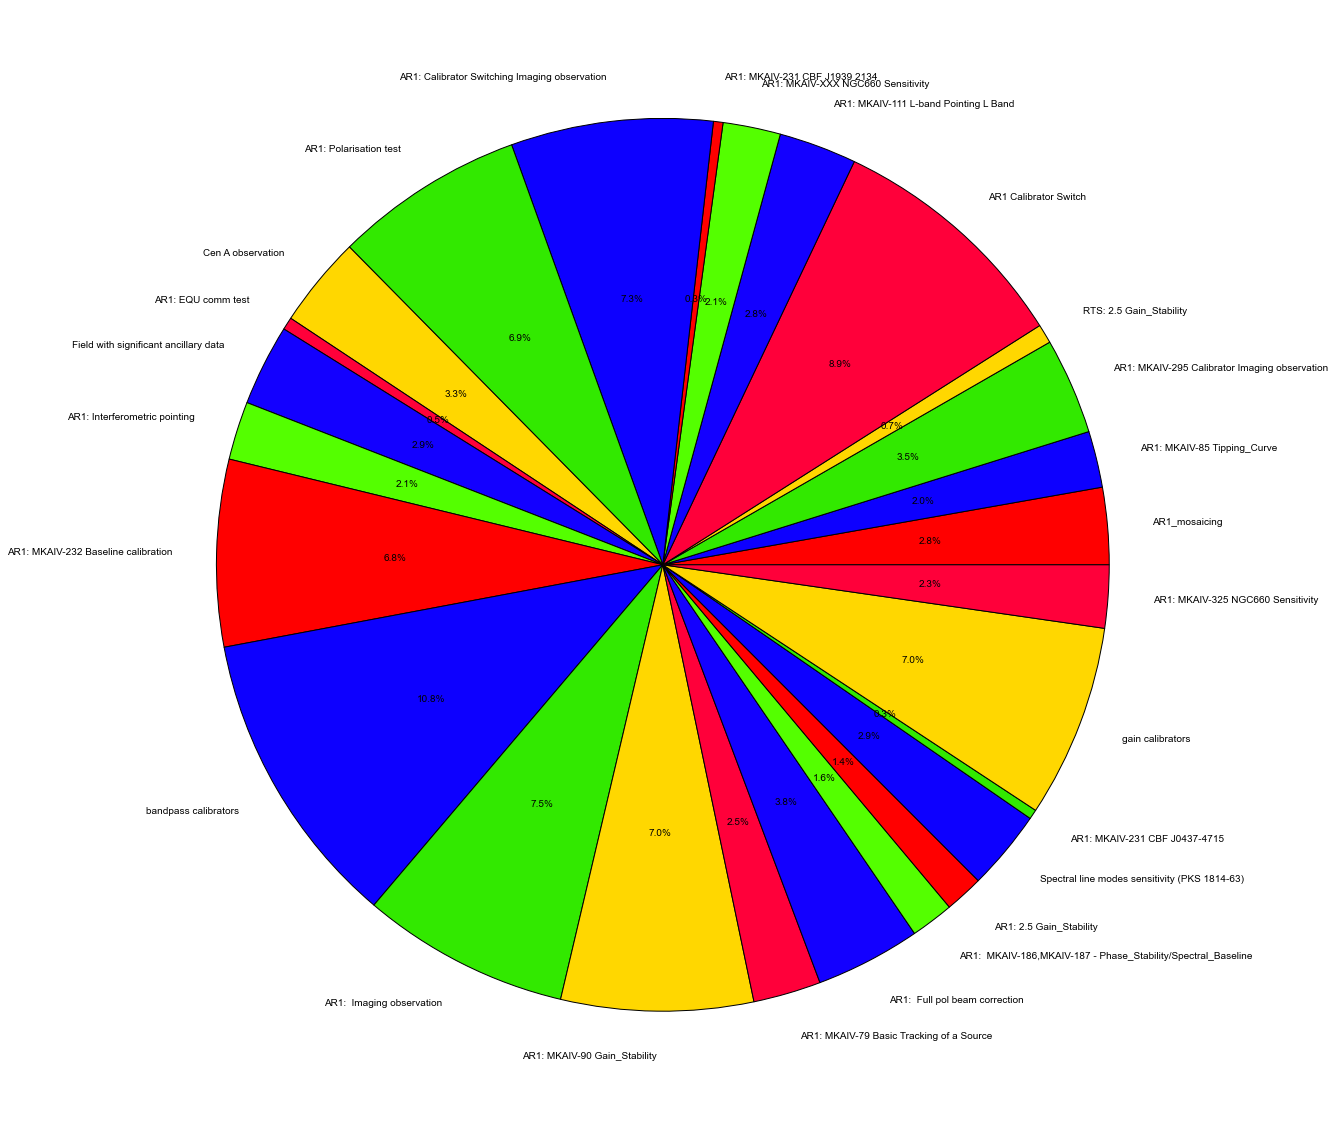

In [36]:
plt.figure(figsize=(20,20))
plt.pie(a_time,labels=a_id,colors=colors,autopct='%1.1f%%');

In [37]:
plt.show()